# Keras Tutorial

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

C:\Users\PEIM001\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


## Building a model in Keras

In [3]:
def HappyModel(input_shape):
    
    # Define input placeholder
    X_input = Input(input_shape)
    
    # Zero-padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    #CONV -> Batch Norm -> ReLU
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)
    
    # Maxpool
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    # Flatten X
    X = Flatten()(X)
    
    #Fully-connected layer
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    # Create model
    model = Model(inputs=X_input, outputs=X, name='HappyModel')
    
    return model

In [4]:
happyModel = HappyModel(X_train.shape[1:])

In [5]:
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [6]:
happyModel.fit(X_train, Y_train, epochs=40, batch_size=50)

Epoch 1/40
600/600 [==============================] - 8s 13ms/step - loss: 3.1503 - acc: 0.5533
Epoch 2/40
600/600 [==============================] - 7s 12ms/step - loss: 0.6343 - acc: 0.7517
Epoch 3/40
600/600 [==============================] - 7s 12ms/step - loss: 0.2947 - acc: 0.8750
Epoch 4/40
600/600 [==============================] - 7s 12ms/step - loss: 0.2663 - acc: 0.8683
Epoch 5/40
600/600 [==============================] - 7s 12ms/step - loss: 0.2008 - acc: 0.9167
Epoch 6/40
600/600 [==============================] - 7s 12ms/step - loss: 0.2248 - acc: 0.9067
Epoch 7/40
600/600 [==============================] - 8s 13ms/step - loss: 0.1735 - acc: 0.9300
Epoch 8/40
600/600 [==============================] - 8s 13ms/step - loss: 0.1036 - acc: 0.9650
Epoch 9/40
600/600 [==============================] - 8s 13ms/step - loss: 0.1141 - acc: 0.9550
Epoch 10/40
600/600 [==============================] - 8s 13ms/step - loss: 0.0920 - acc: 0.9717
Epoch 11/40
600/600 [==================

In [7]:
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 4ms/step

Loss = 0.5057704842090607
Test Accuracy = 0.8133333325386047


In [8]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

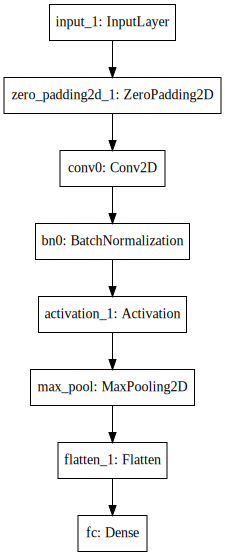

In [9]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))